In [1]:
import os
import numpy as np
import cv2
import random

import time

import matplotlib.pyplot as plt
import numpy as np
from functools import reduce

import copy
import torch
import torch.nn as nn
import torch.nn.functional as F


from model import LaneNet
from lane_cluster_hnet import LaneClusterHnet
from lanenet_hnet_model2 import HNet

torch.backends.cudnn.benchmark=True

In [2]:
def same_seed(seed=2019):
    np.random.seed(seed)  # Numpy module.
    random.seed(seed)  # Python random module.
    torch.manual_seed(seed)
    if torch.cuda.is_available():
        torch.cuda.manual_seed(seed)
        torch.cuda.manual_seed_all(seed)
same_seed(42)

In [3]:
def minmax_scale(arr):
        min_val = np.min(arr)
        max_val = np.max(arr)

        output_arr = (arr - min_val) * 255.0 / (max_val - min_val)
        return output_arr

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
model_lnet=LaneNet()
model_lnet.load_state_dict(torch.load('best_weights/model_2_0.055047884583473206_52.pkl'))
model_lnet.eval();

In [6]:
model_hnet = HNet()
model_hnet.load_state_dict(torch.load('best_weights/model_b1_hnet_0.07057_23.pkl'))
model_hnet.eval();

In [7]:
img1=cv2.imread('demo_images/15.jpg',cv2.IMREAD_COLOR)
img2=cv2.imread('demo_images/17.jpg',cv2.IMREAD_COLOR)
img3=cv2.imread('demo_images/18.jpg',cv2.IMREAD_COLOR)

In [8]:
cluster=LaneClusterHnet(image = img1, 
                        method='DBSCAN', degree=3,
                        modelh = model_hnet, modelseg = model_lnet)

tensor([[-2.0239e-01, -1.7142e+01,  3.7989e+02],
        [ 0.0000e+00, -1.6976e+01,  3.7068e+02],
        [ 0.0000e+00, -4.6461e-02,  1.0000e+00]], grad_fn=<ViewBackward>)
Segmentation output
Final lane predicts after lane fitting


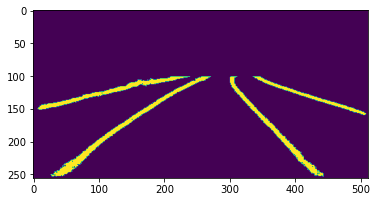

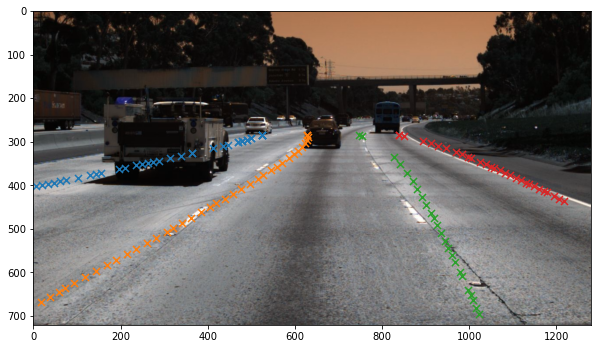

In [9]:
x_preds =cluster()

### My best HNet weights seems not as good as it should be
### so, in order to get decent predictions, I have to cut top of the segmented image - is a dirty trick, but help a lot to get a decent pics,
### on examples you can see that predictions is cutted (I use rectangle in lane_cluster_hnet.py on line 53)
### I've got another weights for hnet, in folder 'best_weights', named 'best_weights/model_b1_hnet_0.22103_67.pkl' and it fits perfectly without cutting but only 2 degree polynoms, for degree 3 it shows completely mess 


In [10]:
cluster=LaneClusterHnet(image = img2, 
                        method='DBSCAN', degree=3,
                        modelh = model_hnet, modelseg = model_lnet)

tensor([[-2.0409e-01, -1.7125e+01,  3.7989e+02],
        [ 0.0000e+00, -1.6987e+01,  3.7069e+02],
        [ 0.0000e+00, -4.6637e-02,  1.0000e+00]], grad_fn=<ViewBackward>)
Segmentation output
Final lane predicts after lane fitting


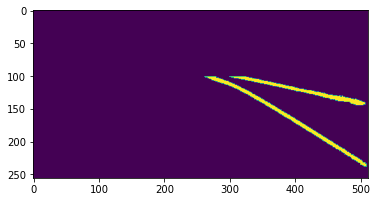

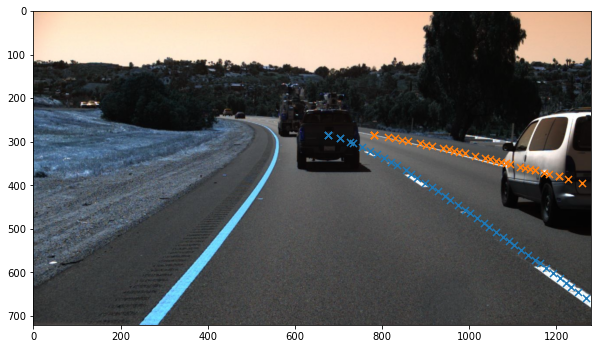

In [11]:
x_preds =cluster()

In [12]:
cluster=LaneClusterHnet(image = img3, 
                        method='DBSCAN', degree=3,
                        modelh = model_hnet, modelseg = model_lnet)

tensor([[-2.0311e-01, -1.7113e+01,  3.7988e+02],
        [ 0.0000e+00, -1.6997e+01,  3.7068e+02],
        [ 0.0000e+00, -4.6727e-02,  1.0000e+00]], grad_fn=<ViewBackward>)
Segmentation output
Final lane predicts after lane fitting


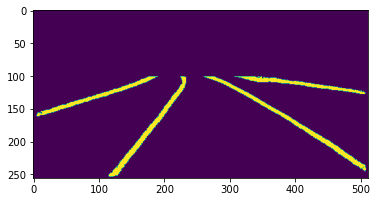

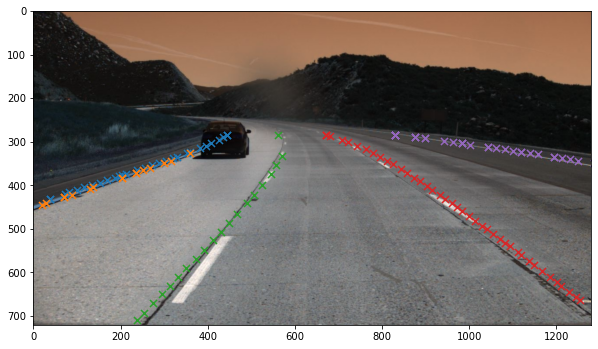

In [13]:
x_preds =cluster()